In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np
from scipy.interpolate import interp1d

In [2]:
import pandas as pd

df = pd.read_csv('../sim_logs/summary_non_zero_idle.csv')

# df = pd.concat([df1,df2,df3], ignore_index=True)
# print(df.shape)

statistics_df = df.copy(deep=True)
statistics_df['Overall_Fuel_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['Overall_Electricity_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['ICE_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['BEV_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['PHEV_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['HFCV_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['Money_Reduction'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
for idx in statistics_df.index:
    base_df = statistics_df[(statistics_df['Vehicle_Fleet'] == statistics_df['Vehicle_Fleet'][idx]) 
             & (statistics_df['Demand_Percentage(%)'] == statistics_df['Demand_Percentage(%)'][idx]) 
             & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == statistics_df['Eco_Routing_with_Travel_Time(0/1)'][idx]) 
             & (statistics_df['Prediction_Horizon(min)'] == statistics_df['Prediction_Horizon(min)'][idx]) 
             & (statistics_df['CAV_Penetration(%)'] == 0)]
    base_overall_fuel = base_df['Overall_Fuel_Used(gallon)'].values[0]
    base_overall_electricity = base_df['Overall_Electricity_Used(kWh)'].values[0]
    base_ice = base_df['Fuel_Used_ICE_NONCAV_Avg(gallon)'].values[0]
    base_bev = base_df['Electricity_Used_BEV_NONCAV_Avg(kWh)'].values[0]
    base_phev = base_df['Electricity_Used_PHEV_NONCAV_Avg(kWh)'].values[0]
    base_hfcv = base_df['Electricity_Used_HFCV_NONCAV_Avg(kWh)'].values[0]
    base_money = base_df['Overall_Fuel_Cost($)'].values[0] + base_df['Overall_Electricity_Cost($)'].values[0] 
    
    statistics_df['Overall_Fuel_Reduction'][idx] = (statistics_df['Overall_Fuel_Used(gallon)'][idx] - base_overall_fuel) / base_overall_fuel * 100.0
    statistics_df['Overall_Electricity_Reduction'][idx] = (statistics_df['Overall_Electricity_Used(kWh)'][idx] - base_overall_electricity) / base_overall_electricity * 100.0
    if statistics_df['Fuel_Used_ICE_Avg(gallon)'][idx] > 0:
        statistics_df['ICE_Reduction'][idx] = (statistics_df['Fuel_Used_ICE_Avg(gallon)'][idx] - base_ice) / base_ice * 100.0
    else:
        statistics_df['ICE_Reduction'][idx] = 0.0
        
    if statistics_df['Electricity_Used_BEV_Avg(kWh)'][idx] > 0:
        statistics_df['BEV_Reduction'][idx] = (statistics_df['Electricity_Used_BEV_Avg(kWh)'][idx] - base_bev) / base_bev * 100.0
    else:
        statistics_df['BEV_Reduction'][idx] = 0.0
        
    if statistics_df['Electricity_Used_PHEV_Avg(kWh)'][idx] > 0:
        statistics_df['PHEV_Reduction'][idx] = (statistics_df['Electricity_Used_PHEV_Avg(kWh)'][idx] - base_phev) / base_phev * 100.0
    else:
        statistics_df['PHEV_Reduction'][idx] = 0.0
        
    if statistics_df['Electricity_Used_HFCV_Avg(kWh)'][idx] > 0:
        statistics_df['HFCV_Reduction'][idx] = (statistics_df['Electricity_Used_HFCV_Avg(kWh)'][idx] - base_hfcv) / base_hfcv * 100.0
    else:
        statistics_df['HFCV_Reduction'][idx] = 0.0
    statistics_df['Money_Reduction'][idx] = (statistics_df['Overall_Fuel_Cost($)'][idx] + statistics_df['Overall_Electricity_Cost($)'][idx] - base_money ) / base_money * 100.0


C:\Users\lidon\AppData\Local\Temp\ipykernel_18540\2958171988.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Fuel_Reduction'][idx] = (statistics_df['Overall_Fuel_Used(gallon)'][idx] - base_overall_fuel) / base_overall_fuel * 100.0
C:\Users\lidon\AppData\Local\Temp\ipykernel_18540\2958171988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Electricity_Reduction'][idx] = (statistics_df['Overall_Electricity_Used(kWh)'][idx] - base_overall_electricity) / base_overall_electricity * 100.0
C:\Users\lidon\AppData\Local\Temp\ipykernel_18540\2958171988.py:35: SettingWithCopy

In [3]:
df.shape

(33, 82)

In [4]:

def plotAllTypes(vehicle_fleet='2030',
                 demand_percentage=100,
                 eco_routing_with_travel_time=0,
                 prediction_horizon=5,
                 save_fig=False):

    linewidths = [2, 2.5, 2.8, 2]
    linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

    sns.set_theme(style='whitegrid', palette='bright')
    # sns.set_style("whitegrid")
    # statistics_df = plot_global.statistics_df
    target_df = statistics_df[(statistics_df['Vehicle_Fleet'] == vehicle_fleet)
                              & (statistics_df['Demand_Percentage(%)'] == demand_percentage)
                              & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == eco_routing_with_travel_time)
                              & (statistics_df['Prediction_Horizon(min)'] == prediction_horizon)]

    g = sns.lineplot(x='CAV_Penetration(%)', y='ICE_Reduction',
                     data=target_df, label='ICE_Reduction', linewidth=linewidths[0], linestyle=linestyles[0])
    if vehicle_fleet != 'ICE':
        g = sns.lineplot(x='CAV_Penetration(%)', y='BEV_Reduction',
                        data=target_df, label='BEV_Reduction', linewidth=linewidths[1], linestyle=linestyles[1])
        g = sns.lineplot(x='CAV_Penetration(%)', y='PHEV_Reduction',
                        data=target_df, label='PHEV_Reduction', linewidth=linewidths[2], linestyle=linestyles[2])
        g = sns.lineplot(x='CAV_Penetration(%)', y='HFCV_Reduction',
                        data=target_df, label='HFCV_Reduction', linewidth=linewidths[3], linestyle=linestyles[3])
    if prediction_horizon == 0:
        title = '{} Fleet: Demand {}% Real-time '.format(
            vehicle_fleet, demand_percentage)
    else:
        title = '{} Fleet: Demand {}% Predict {}min '.format(
            vehicle_fleet, demand_percentage, prediction_horizon)
    if eco_routing_with_travel_time:
        title += 'Travel time routing'
    else:
        title += 'Eco-routing'
    plt.ylim([-40, 40])
    plt.xlim([0, 100])
    plt.title(title, fontweight='bold', fontsize=18, y = 1.05)
    plt.ylabel("Energy Reduction (%)", fontsize=16)
    plt.xlabel("CAV Penetration (%)", fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(fontsize=14)
    if save_fig:
        file_name = 'figures/NonZeroIdle_{}_Demand_{}_Predict_{}'.format(
            vehicle_fleet, demand_percentage, prediction_horizon)
        if eco_routing_with_travel_time:
            file_name += '_TravelTimeRouting.pdf'
        else:
            file_name += '_Ecorouting.pdf'
        if os.path.isfile(file_name):
            os.remove(file_name)
        plt.savefig(file_name, bbox_inches='tight')  # , format='pdf')

    plt.show(block=False)

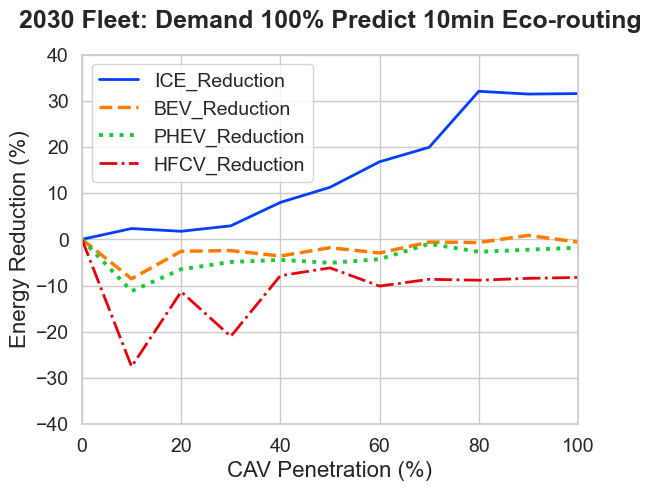

In [5]:
vehicle_fleet='2030'
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=10
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = False)


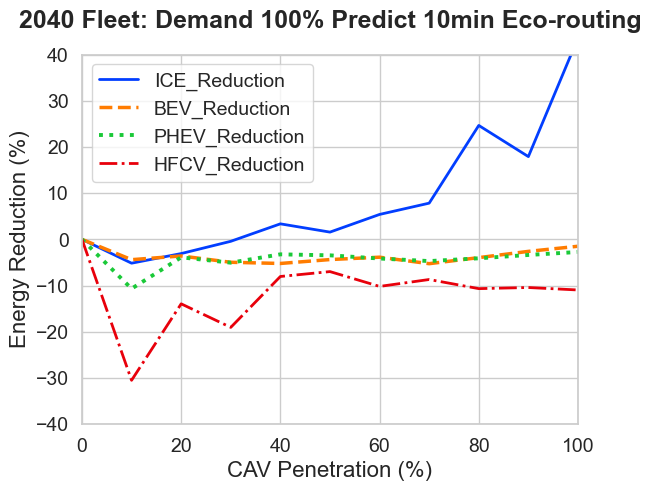

In [6]:
vehicle_fleet='2040'
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=10
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = False)


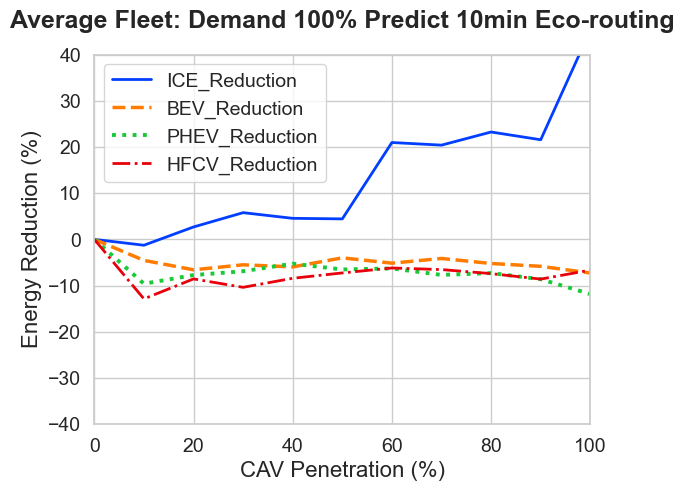

In [7]:
vehicle_fleet='Average'
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=10
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = False)
